In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data (adjust accordingly)
df = pd.read_excel('/content/drive/MyDrive/PYTHON_PRACTICE/Clustering/03_03.xlsx',sheet_name = 'mrt')  # or load however appropriate
df = df.rename(columns={i: f"mrt_{i}" for i in range(25)})
df.head()

,x,y,mrt_0,mrt_1,mrt_2,mrt_3,mrt_4,mrt_5,mrt_6,mrt_7,...,mrt_14,mrt_15,mrt_16,mrt_17,mrt_18,mrt_19,mrt_20,mrt_21,mrt_22,mrt_23
0,0.25,0.25,23.866192,23.092770,22.430245,21.954403,21.722273,21.527366,21.549542,21.855416,...,31.777504,31.337045,30.809779,30.315391,29.488158,28.049794,26.681682,25.849260,25.195018,24.498469
1,0.25,0.75,23.836246,23.049927,22.389334,21.925890,21.704754,21.508992,21.556483,21.886821,...,32.190185,31.634341,31.091860,30.585608,29.702096,28.101400,26.685461,25.835563,25.171056,24.472778
2,0.25,1.25,23.908159,23.134892,22.475784,22.002136,21.767767,21.568330,21.599039,21.893981,...,32.109071,31.631715,31.121204,30.632865,29.764575,28.192156,26.759405,25.901815,25.237607,24.541371
3,0.25,1.75,23.972964,23.212677,22.554613,22.070565,21.823468,21.621077,21.636016,21.903388,...,31.981260,31.592514,31.116250,30.642252,29.792905,28.266210,26.822489,25.959696,25.296998,24.602716
4,0.25,2.25,24.019873,23.269471,22.611969,22.119785,21.863118,21.658787,21.660706,21.907484,...,31.860119,31.541720,31.092261,30.632767,29.803714,28.320340,26.867684,26.001017,25.339805,24.646896


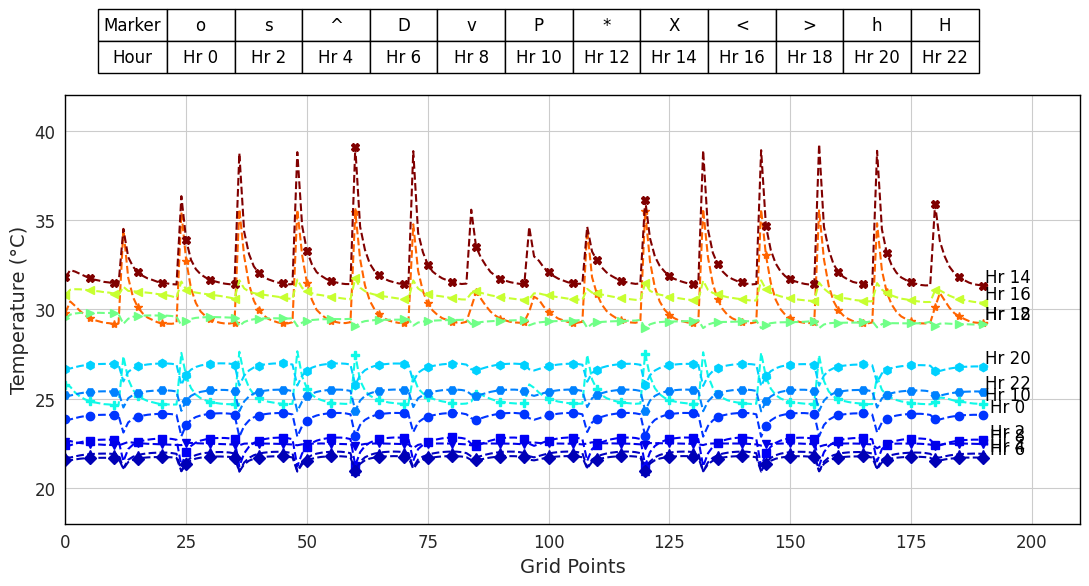

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np

# Set font
mpl.rcParams['font.family'] = 'Times New Roman'

# Load data
df = pd.read_excel('/content/drive/MyDrive/PYTHON_PRACTICE/Clustering/03_03.xlsx',sheet_name = 'mrt')
df = df.rename(columns={i: f"mrt_{i}" for i in range(25)})
data = df.iloc[:, 2::2]  # Use 2-hour intervals: mrt_0, mrt_2, ..., mrt_22 (12 columns)

# Seaborn style
sns.set_style("whitegrid")

# Colormap and markers
cmap = plt.get_cmap('jet')
markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', '<', '>', 'h', 'H', '+', 'x', 'd', '|', '_'] * 2

# Normalize for color mapping
norm = plt.Normalize(vmin=data.min().min(), vmax=data.max().max())

# Create plot
fig, ax = plt.subplots(figsize=(11, 6))

# Plot each 2-hour data
for idx, hour in enumerate(data.columns):
    y = data[hour]
    color = cmap(norm(y.max()))

    ax.plot(
        data.index,
        y,
        color=color,
        linestyle='--',
        linewidth=1.5,
        marker=markers[idx],
        markevery=5,
        markersize=6,
    )

    # Label at the end of each line
    ax.text(
        x=195,
        y=y.iloc[-1],
        s=hour.replace("mrt_", "Hr "),
        color='black',
        fontsize=12,
        va='bottom',
        ha='center'
    )

# Axes and limits
ax.set_xlabel('Grid Points', fontsize=14)
ax.set_ylabel('Temperature (°C)', fontsize=14)
ax.set_xlim(0, 210)
ax.set_ylim(18, 42)

# Bold black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Grid and ticks
ax.grid(True)
ax.tick_params(axis='both', labelsize=12)

# Build vertical table data
hour_labels = [f"Hr {i}" for i in range(0, 24, 2)]
marker_symbols = markers[:12]

# First column labels
column_labels = ['Marker', 'Hour']
# Build data as 2 rows: first row = markers, second = hour labels
table_data = [[m for m in marker_symbols], [h for h in hour_labels]]

# Add header column
row_labels = column_labels

# Create the table at the top
the_table = plt.table(
    cellText=table_data,
    rowLabels=row_labels,
    colWidths=[0.065] * 12,
    cellLoc='center',
    rowLoc='center',
    loc='top',
    bbox=[0.1, 1.05, 0.8, 0.15]  # [left, bottom, width, height]
)

# Format table
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
for key, cell in the_table.get_celld().items():
    cell.set_text_props(color='black')

# Adjust layout to make space for table
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

In [230]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap

# Plotting and figure settings
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.facecolor"] = "white"


def get_global_min_max(df, mrt_columns):
    return df[mrt_columns].min().min(), df[mrt_columns].max().max()


def compute_optics_clusters(data_scaled, min_samples = 5):
    optics = OPTICS(min_samples= min_samples)
    labels = optics.fit_predict(data_scaled)
    return labels


def evaluate_clustering(data_scaled, labels):
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    sil_score = -1
    if num_clusters > 1 and np.count_nonzero(labels >= 0) > 1:
        try:
            sil_score = silhouette_score(data_scaled, labels)
        except:
            sil_score = -1
    return sil_score, num_clusters


from matplotlib import colors as mcolors

def assign_colors(labels):
    """ Assigns distinguishable RGBA colors to each cluster label. """
    base_colors = [
        'green', 'red', 'blue', 'black'
    ]

    color_map = {}
    unique_labels = np.unique(labels)

    for idx, lbl in enumerate(unique_labels):
        if lbl == -1:
            color_map[lbl] = (0.6, 0.6, 0.6, 0.3)  # noise as RGBA
        else:
            color_name = base_colors[idx % len(base_colors)]
            rgba = mcolors.to_rgba(color_name)  # Convert to RGBA
            color_map[lbl] = rgba

    return np.array([color_map[lbl] for lbl in labels])



def draw_bounding_box(ax, x, y, z_top):
    """ Draws bounding box in 3D """
    bbox_lines = [
        [[x.min(), x.max()], [y.min(), y.min()], [0, 0]],
        [[x.max(), x.max()], [y.min(), y.max()], [0, 0]],
        [[x.max(), x.min()], [y.max(), y.max()], [0, 0]],
        [[x.min(), x.min()], [y.max(), y.min()], [0, 0]],
        [[x.min(), x.min()], [y.min(), y.min()], [0, z_top]],
        [[x.max(), x.max()], [y.min(), y.min()], [0, z_top]],
        [[x.max(), x.max()], [y.max(), y.max()], [0, z_top]],
        [[x.min(), x.min()], [y.max(), y.max()], [0, z_top]],
        [[x.min(), x.max()], [y.min(), y.min()], [z_top, z_top]],
        [[x.max(), x.max()], [y.min(), y.max()], [z_top, z_top]],
        [[x.max(), x.min()], [y.max(), y.max()], [z_top, z_top]],
        [[x.min(), x.min()], [y.max(), y.min()], [z_top, z_top]],
    ]
    for line in bbox_lines:
        ax.plot(line[0], line[1], line[2], color='black', linewidth=0.8, alpha=1)


def plot_hourly_clusters(df, global_min, global_max, mrt_columns):
    fig = plt.figure(figsize=(12, 20), dpi=300)

    for i in range(24):
        hour_col = mrt_columns[i]
        ax = fig.add_subplot(6, 4, i + 1, projection='3d')
        ax.set_facecolor('white')

        x = df['x'].values
        y = df['y'].values[::-1]  # Flip for visual
        mrt = df[hour_col].values
        z = mrt - global_min

        # Clustering
        cluster_data = np.column_stack((x, y, mrt))
        cluster_data_scaled = StandardScaler().fit_transform(cluster_data)

        labels = compute_optics_clusters(cluster_data_scaled, min_samples = min_sample)
        sil_score, num_clusters = evaluate_clustering(cluster_data_scaled, labels)

        print(f"Hour {i}: silhouette_score = {sil_score:.2f}")

        if sil_score < 0.3:
            labels = np.zeros_like(labels)
            clustering_used = False
            num_clusters = 1
        else:
            clustering_used = True

        # Assign cluster colors
        colors = assign_colors(labels)

        # Scatter plot
        ax.scatter(x, y, z, c=colors, s=10)
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())
        ax.set_zlim(0, global_max - global_min)
        ax.set_box_aspect([1, 6/8, 2.7/8])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.view_init(elev=30, azim=135)
        ax.set_title(
            f'Hour {i}\n{"Clustered" if clustering_used else "Single Cluster"} - {num_clusters}',
            fontsize=12, color='black'
        )

        draw_bounding_box(ax, x, y, global_max - global_min)

    plt.tight_layout()
    plt.show()


# === MAIN EXECUTION ===
mrt_columns = [f"mrt_{i}" for i in range(24)]
df_cluster = df.copy()

min_sample = 7
global_min, global_max = get_global_min_max(df_cluster, mrt_columns)
plot_hourly_clusters(df_cluster, global_min, global_max, mrt_columns)

Output hidden; open in https://colab.research.google.com to view.

In [233]:
df_mrt = df.copy()

for col in df.columns[2:]:  # loop through column names, not Series
    mrt_median = df_mrt[col].median()
    df_mrt[col] = df_mrt[col].apply(lambda x: 1 if abs(x) >= (mrt_median + 2) else 0)

df_mrt.head()

,x,y,mrt_0,mrt_1,mrt_2,mrt_3,mrt_4,mrt_5,mrt_6,mrt_7,...,mrt_14,mrt_15,mrt_16,mrt_17,mrt_18,mrt_19,mrt_20,mrt_21,mrt_22,mrt_23
0,0.25,0.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.25,0.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.25,1.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.25,1.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.25,2.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
total_ones = (df_mrt.iloc[:, 2:] == 1).sum().sum()
total_zeros = (df_mrt.iloc[:, 2:] == 0).sum().sum()

print(f"Total 1s: {total_ones}")
print(f"Total 0s: {total_zeros}")

Total 1s: 116
Total 0s: 4492


In [236]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Set global font to serif (Times New Roman style)
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.facecolor"] = "white"

# Assuming df_mrt has columns: x, y, mrt_0 to mrt_23
fig = plt.figure(figsize=(12, 18), dpi=300)

# Compute global z-scaling limits for consistent color and elevation
mrt_columns = [f"mrt_{i}" for i in range(24)]
global_min = df_mrt[mrt_columns].min().min()
global_max = df_mrt[mrt_columns].max().max()

x_min, x_max = df_mrt['x'].min(), df_mrt['x'].max()
y_min, y_max = df_mrt['y'].min(), df_mrt['y'].max()
z_min, z_max = global_min, global_max

def draw_wireframe(ax, x_min, x_max, y_min, y_max, z_min, z_max, color='black', alpha=1):
    """Draw a 3D bounding box wireframe."""
    # 12 lines of the box
    lines = [
        # Bottom square
        [[x_min, x_max], [y_min, y_min], [z_min, z_min]],
        [[x_max, x_max], [y_min, y_max], [z_min, z_min]],
        [[x_max, x_min], [y_max, y_max], [z_min, z_min]],
        [[x_min, x_min], [y_max, y_min], [z_min, z_min]],
        # Top square
        [[x_min, x_max], [y_min, y_min], [z_max, z_max]],
        [[x_max, x_max], [y_min, y_max], [z_max, z_max]],
        [[x_max, x_min], [y_max, y_max], [z_max, z_max]],
        [[x_min, x_min], [y_max, y_min], [z_max, z_max]],
        # Vertical edges
        [[x_min, x_min], [y_min, y_min], [z_min, z_max]],
        [[x_max, x_max], [y_min, y_min], [z_min, z_max]],
        [[x_max, x_max], [y_max, y_max], [z_min, z_max]],
        [[x_min, x_min], [y_max, y_max], [z_min, z_max]],
    ]
    for line in lines:
        ax.plot(line[0], line[1], line[2], color=color, linewidth=0.6, alpha=alpha)

for i in range(24):
    ax = fig.add_subplot(6, 4, i + 1, projection='3d')
    ax.set_facecolor('white')

    hour_col = f"mrt_{i}"
    x = df_mrt['x'].values
    y = df_mrt['y'].values[::-1]
    z = df_mrt[hour_col].values

    # Scatter in 3D with color mapped to z
    sc = ax.scatter(x, y, z, c=z, cmap='jet', s=5, vmin=global_min, vmax=global_max)

    ax.set_title(f'Hour {i}', fontsize=8, color='black')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    ax.view_init(elev=30, azim=135)
    ax.set_box_aspect([1, 6/8, 2.7/8])

    # Draw the wireframe box
    draw_wireframe(ax, x_min, x_max, y_min, y_max, z_min, z_max)

plt.subplots_adjust(wspace=0.1, hspace=0.3, right=0.9)
plt.show()


Output hidden; open in https://colab.research.google.com to view.